Feature ranking:
1. Feature Daily Steps (0.151956)
2. Feature Age (0.144220)
3. Feature Physical Activity Level (0.123218)
4. Feature Occupation_Nurse (0.107924)
5. Feature Blood Pressure_140/95 (0.084013)
6. Feature Heart Rate (0.060122)
7. Feature Sleep Duration (0.057564)
8. Feature Quality of Sleep (0.038999)
9. Feature Blood Pressure_130/85 (0.037297)
10. Feature Stress Level (0.030392)
11. Feature Occupation_Teacher (0.018947)
12. Feature Blood Pressure_135/90 (0.014644)
13. Feature BMI Category_Overweight (0.013156)
14. Feature Occupation_Salesperson (0.012083)
15. Feature Occupation_Accountant (0.011376)
16. Feature Gender_Female (0.008553)
17. Feature Gender_Male (0.008288)
18. Feature Occupation_Sales Representative (0.007371)
19. Feature Occupation_Engineer (0.006951)
20. Feature Occupation_Lawyer (0.006028)
21. Feature BMI Category_Normal (0.005489)
22. Feature BMI Category_Obese (0.005250)
23. Feature Occupation_Doctor (0.004929)
24. Feature BMI Category_Normal Weight (0.0

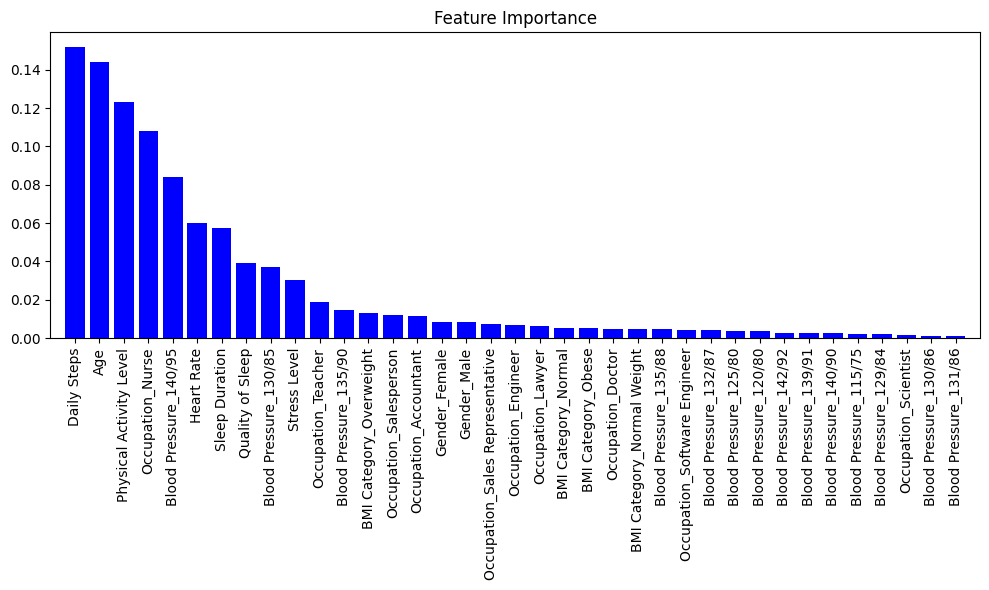

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

# Drop rows with NaN values in the target variable (Y)
data.dropna(subset=['Sleep Disorder'], inplace=True)

# Separate features (X) and target (Y)
X = data.drop(columns=['Sleep Disorder'])  # Features
Y = data['Sleep Disorder']  # Target

# Convert categorical variables into dummy/indicator variables if needed
X = pd.get_dummies(X)

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_imputed, Y)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_imputed.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns[indices[f]], feature_importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_imputed.shape[1]), feature_importances[indices],
       color="b", align="center")
plt.xticks(range(X_imputed.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X_imputed.shape[1]])
plt.tight_layout()
plt.show()
